<a href="https://colab.research.google.com/github/Vinay3022272/Automated-Data-Inconsistency-Detection-Tool/blob/main/Linear_Reg(wt_ht).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df_copy = pd.read_csv("height-weight.csv")
df_copy.head(4)
df=df_copy.copy()
df.head(4)

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145


/tmp/ipython-input-1139212631.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x="Weight", y="Height",palette="Set1")


Text(0, 0.5, 'Height')

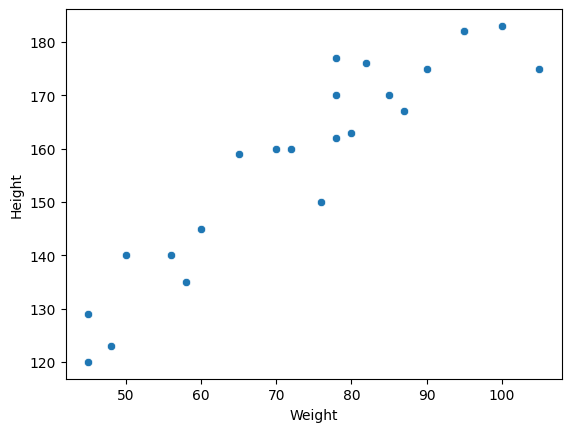

In [21]:
sns.scatterplot(data=df, x="Weight", y="Height",palette="Set1")
plt.xlabel("Weight")
plt.ylabel("Height")

<Axes: >

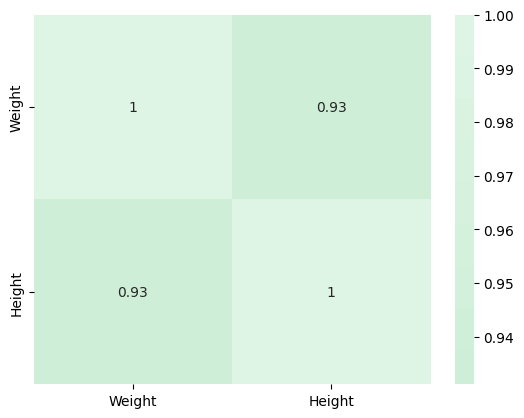

In [24]:
df.corr()
sns.heatmap(df.corr(),annot=True,cmap="mako",center=0)

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


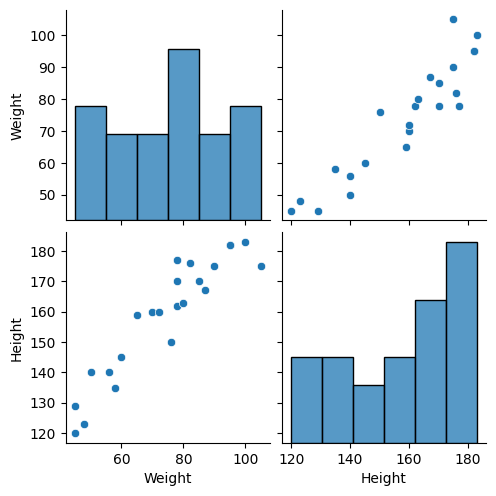

In [26]:
sns.pairplot(df,  palette='Set1')


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


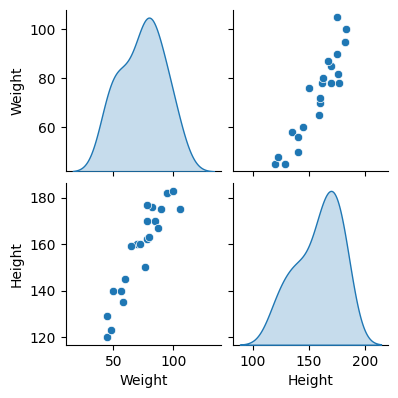

In [30]:
sns.pairplot(df, diag_kind='kde',palette="husl", height=2)


##Feature creation


In [32]:
X = df[["Weight"]]
y = df["Height"]


In [48]:
# Train_Test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape

(17, 1)

In [49]:
# Standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
# Apply linear regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)
print("Slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Slope: [17.2982057]
Intercept: 156.47058823529412


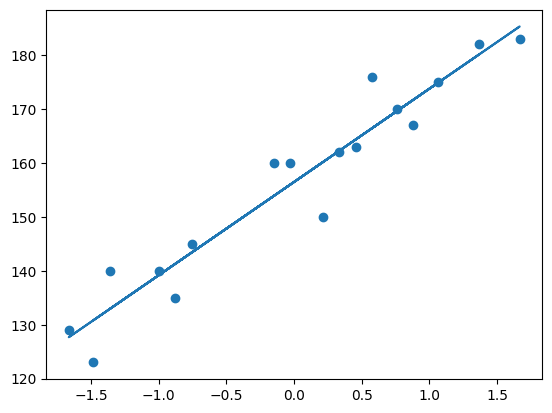

In [51]:
# plotting the train data with the best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train, regression.predict(X_train))

In [52]:
# Prediction for test data
y_pred = regression.predict(X_test)

In [58]:
# Performance metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

score = r2_score(y_test,y_pred)

n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1 - ((1 - score) * (n - 1)) / (n - p - 1)


print("MSE:",mse)
print("MAE:",mae)
print("RMSE:",rmse)
print("R2_score:",score)
print("Adj_R2:",adj_r2)

MSE: 114.84069295228699
MAE: 9.66512588679501
RMSE: 10.716374991212605
R2_score: 0.7360826717981276
Adj_R2: 0.6701033397476595


In [62]:
# OLS
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()
pred = model.predict(X_test)
print(model.summary())



                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Wed, 17 Dec 2025   Prob (F-statistic):                       0.664
Time:                        15:09:29   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [65]:
# Prediction for new data
regression.predict(scaler.transform([[72]]))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])